# Life Expectancy and GDP

by Georgios Tsevrenis 14 June 2021

This project notebook is for personal and academic purposes only.

In the current project, I will analyze

- The GDP rate for some random countries between the years 2000-2015
- The correlation between the GDP and the mortality rate in each of the countries between the years 2000-2015

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [2]:
data = pd.read_csv("all_data.csv")
country = data.Country.unique()
year = data.Year.unique()

In [6]:
@interact
def my_function(Choose_Year=year):
    data_of_years = data[data.Year ==Choose_Year]
    fig, ax = plt.subplots(1,1,figsize=(16,6), dpi= 80)
    plt.barh(range(len(country)), data_of_years.GDP / 1000000000000, color='palegreen') 
    ax.set_yticks(range(len(country)))
    ax.set_yticklabels(country)
    plt.ylabel("Country")
    plt.xlabel("GDP")
    plt.title("GDP for the year " + str(Choose_Year) + " in trillion dollars")
    for index, value in enumerate( data_of_years.GDP / 1000000000000):
        plt.text(value, index, str(value))
    plt.show()
    return Choose_Year

interactive(children=(Dropdown(description='Choose_Year', options=(2000, 2001, 2002, 2003, 2004, 2005, 2006, 2…

## In conclusion:

- The GDP rate in Zimbabwe is so low, that it sits on millions, and as a result the bar isn't quite obvious in the chart.
- During the year of 2000, the GDP rate in China was 1.2 trillions, and for Germany was 1.9 trillions. However, during the year of 2007, we can see that China jumped on 3.5 trillions, and as a result, it was at the same level with Germany (3.4 trillions). Therefore, 8 years later in 2015, Germany stayed at the same level, in 3.4 trillions, while China had a huge growth to 11 trillions.
- United States of America had an average steady rising between 0.2 - 1 trillions.
- During the 15 years, Mexico didn't have much growth, compare to other countries, however, its GDP rate was double in 2015.
- Chile had a growth of 1.3 billions during the years 2000-2015

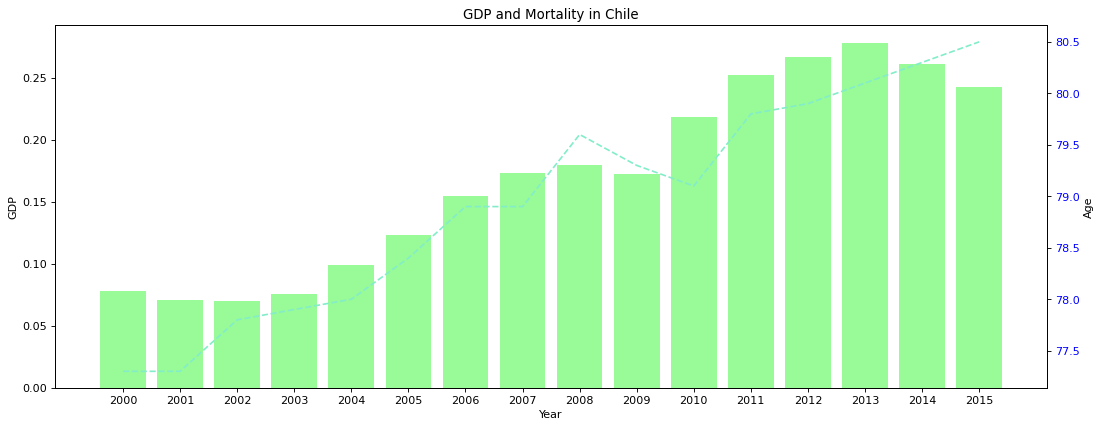

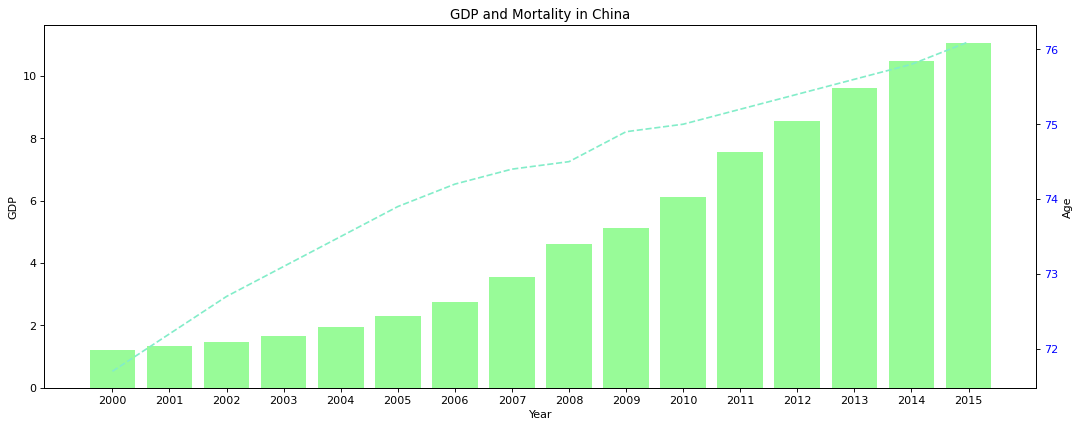

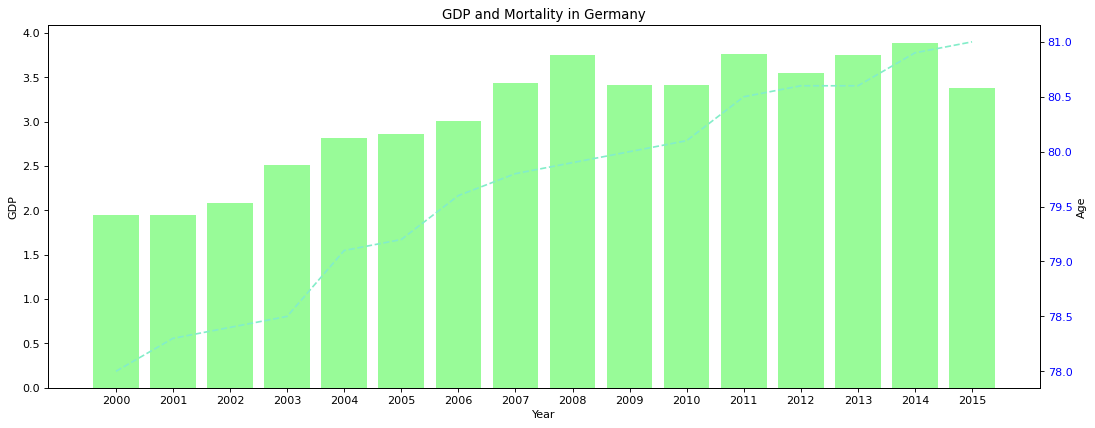

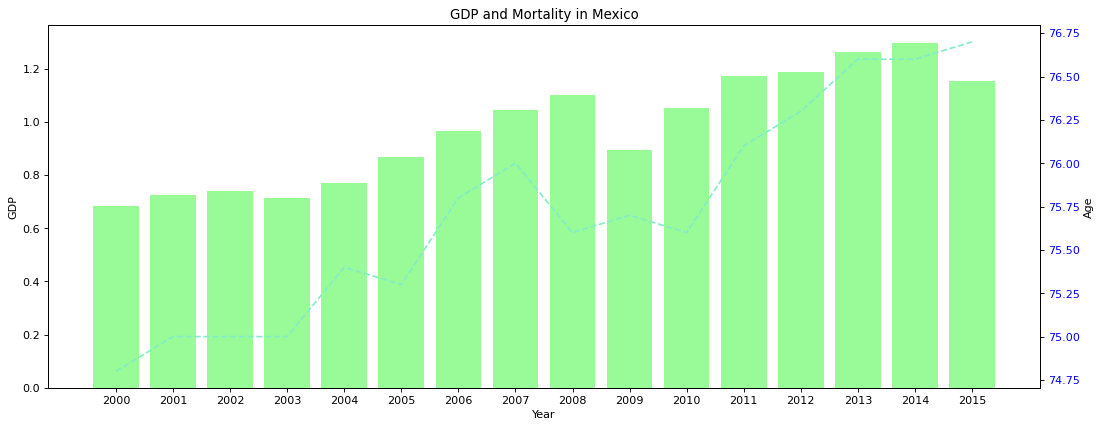

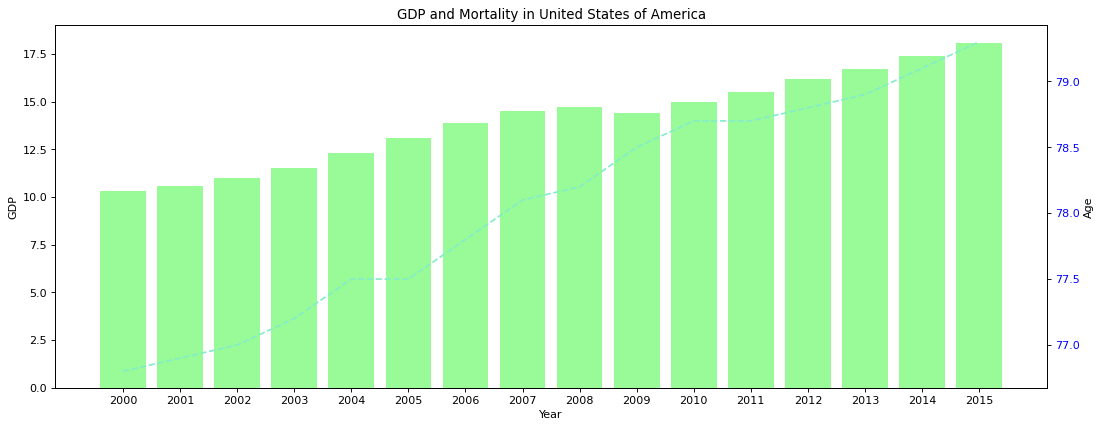

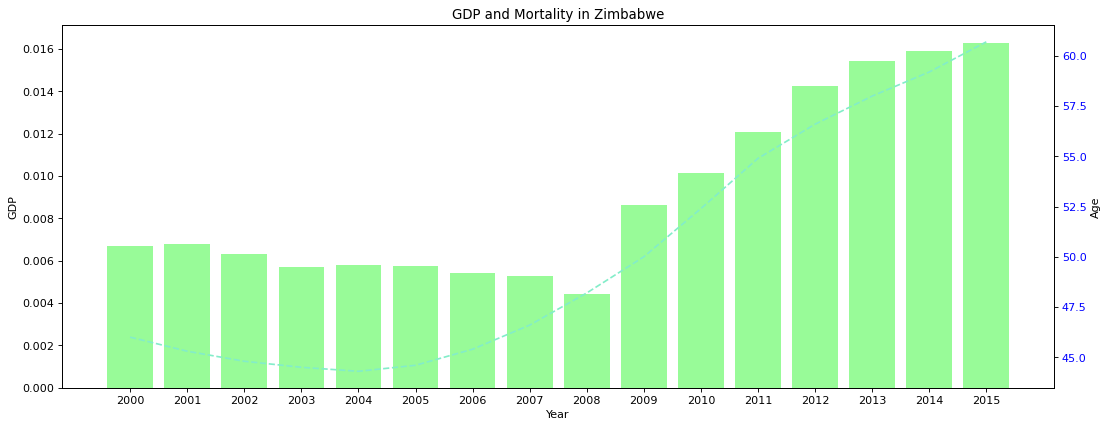

In [4]:
for c in (range(len(country))):
    data = data.rename(columns={"Life expectancy at birth (years)": "Life_expectancy_at_birth"})
    data_of_country = data[data.Country == country[c]]
    
    fig, ax = plt.subplots(1,1,figsize=(16,6), dpi= 80)
    plt.xlabel("Year")
    plt.ylabel("GDP")
    plt.tick_params(axis="y")
    plt.bar(range(len(year)), data_of_country.GDP / 1000000000000, color='palegreen')
    
    plt.twinx()
    plt.ylabel("Age")
    plt.tick_params(axis="y", labelcolor="b")
    plt.plot(range(len(year)), data_of_country.Life_expectancy_at_birth, color ="#83edc9", linestyle = "--")
    
    ax.set_xticks(range(len(year)))
    ax.set_xticklabels(year)
    
    plt.title("GDP and Mortality in " + str(country[c]))
    plt.show()


## In conclusion:

Overall, it seems like the mortality rate affects the GDP rate. It is noticeable though, that the affection is different between the countries, and especially after 2007.
In particular, it might be more obvious in Zimbabwe and Chile, compare to USA and China. Also, it's interesting how Zimbabwe has the lowest GDP rate as well as the lowest mortality rate. However, we cannot take it as a fact that the countries with low GDP rate, they will have a low mortality rate too. For instance, Germany has a high GDP rate compare to Chile, but they both have similar mortality rate.